## **Data loading**

In [1]:
import pandas as pd
df = pd.read_csv("/content/Unicorn_Companies.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,04/07/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/01/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


## **Data Cleaning**

In [2]:
# removing whitespaces
df.columns = df.columns.str.strip()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8   Total Raised       1013 non-null   object 
 9   Financial Stage    49 non-null     object 
 10  Investors Count    1036 non-null   float64
 11  Deal Terms         1008 non-null   float64
 12  Portfolio Exits    49 non-null     float64
dtypes: float64(4), object(9)
memory usage: 105.4+ KB


In [7]:
df.isnull().sum()

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,0
Industry,0
Select Inverstors,17
Founded Year,43
Total Raised,24
Financial Stage,988


In [8]:
# filling missing values in 'Select Inverstors' with 'Unknown'
df['Select Inverstors'].fillna('Unknown', inplace=True)

# filling missing values in 'Founded Year' and 'Investors Count', and 'Deal Terms' with the median
df['Founded Year'].fillna(df['Founded Year'].median(), inplace=True)
df['Investors Count'].fillna(df['Investors Count'].median(), inplace=True)
df['Deal Terms'].fillna(df['Deal Terms'].median(), inplace=True)

# filling missing values in 'Total Raised' with '0'
df['Total Raised'].fillna('0', inplace=True)

# dropping columns with too many missing values
df.drop(['Financial Stage', 'Portfolio Exits'], axis=1, inplace=True)
df.isnull().sum()

/tmp/ipython-input-3952688327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Select Inverstors'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3952688327.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,0
Industry,0
Select Inverstors,0
Founded Year,0
Total Raised,0
Investors Count,0


In [9]:
df['Valuation ($B)'] = df['Valuation ($B)'].replace('[\$,B]', '', regex=True).astype(float)

In [11]:
# converting Date Joined to 'datetime' format
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors = 'coerce')

In [12]:
# creating a new column year
df['Year Joined'] = df['Date Joined'].dt.year

## **SQL Queries**

In [13]:
! pip install -q pandasql

  Preparing metadata (setup.py) ... done


In [14]:
from pandasql import sqldf

In [15]:
pysqldf = lambda q: sqldf(q, globals())

#### **Top 10 Countries by Number of Unicorns**

In [16]:
query1 = """Select country, count(*) as Unicorn_Count from df
group by country
order by Unicorn_Count desc
limit 10"""

pysqldf(query1)

,Country,Unicorn_Count
0,United States,536
1,China,168
2,India,63
3,United Kingdom,42
4,Germany,24
5,France,24
6,Israel,20
7,Canada,19
8,Brazil,16
9,South Korea,12


#### **Top 10 Industries by Number of Unicorns**

In [17]:
query2 = """Select industry, count(*) as Industry_Count from df
group by industry
order by Industry_Count desc
limit 10"""

pysqldf(query2)

,Industry,Industry_Count
0,Fintech,205
1,Internet software & services,192
2,E-commerce & direct-to-consumer,107
3,Artificial intelligence,71
4,Health,69
5,"Supply chain, logistics, & delivery",57
6,Other,56
7,Cybersecurity,49
8,Data management & analytics,41
9,Mobile & telecommunications,37


#### **Year wise Unicorn Growth**

In [18]:
query3 = """Select [Year Joined] as Year, count(*) as Unicorns_Added
from df
group by Year
order by Year"""

pysqldf(query3)

,Year,Unicorns_Added
0,2007,1
1,2011,2
2,2012,4
3,2013,3
4,2014,13
5,2015,35
6,2016,21
7,2017,44
8,2018,103
9,2019,107


#### **Average Valuation by Industry**

In [20]:
query4 = """Select Industry, round(AVG([Valuation ($B)]), 2) AS Avg_Valuation
from df
group by Industry
order by Avg_Valuation DESC
limit 10"""

pysqldf(query4)

,Industry,Avg_Valuation
0,"Sequoia Capital, Thoma Bravo, Softbank",32.00
1,Finttech,10.00
2,Other,4.74
3,Artificial intelligence,4.34
4,Fintech,3.83
5,Kuang-Chi,3.50
6,Auto & transportation,3.33
7,Data management & analytics,3.31
8,Edtech,3.24
9,"Supply chain, logistics, & delivery",3.07


#### **Top 10 Most Valuable Unicorns**

In [21]:
query5 = """Select Company, [Valuation ($B)], Country, Industry
from df
order by [Valuation ($B)] desc
limit 10 """

pysqldf(query5)

,Company,Valuation ($B),Country,Industry
0,Bytedance,140.0,China,Artificial intelligence
1,SpaceX,100.3,United States,Other
2,Stripe,95.0,United States,Fintech
3,Klarna,45.6,Sweden,Fintech
4,Epic Games,42.0,United States,Other
5,Canva,40.0,Australia,Internet software & services
6,Checkout.com,40.0,United Kingdom,Fintech
7,Instacart,39.0,United States,"Supply chain, logistics, & delivery"
8,Databricks,38.0,United States,Data management & analytics
9,Revolut,33.0,United Kingdom,Fintech


## **Data Visualization**

#### **Top 10 Countries with the Most Unicorns**

/tmp/ipython-input-1330308021.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


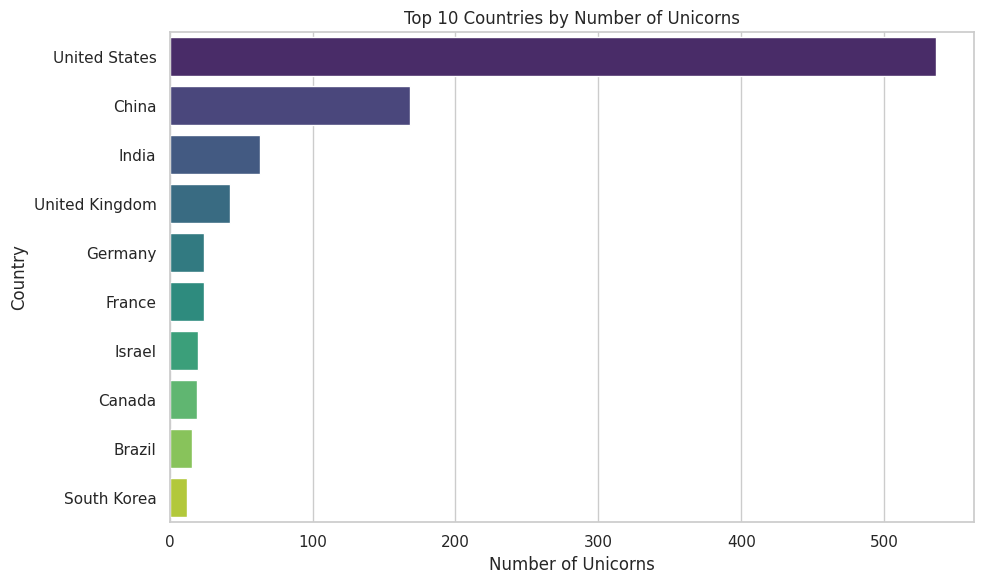

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Top 10 countries
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Number of Unicorns")
plt.xlabel("Number of Unicorns")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#### **Year wise Growth of Unicorns**

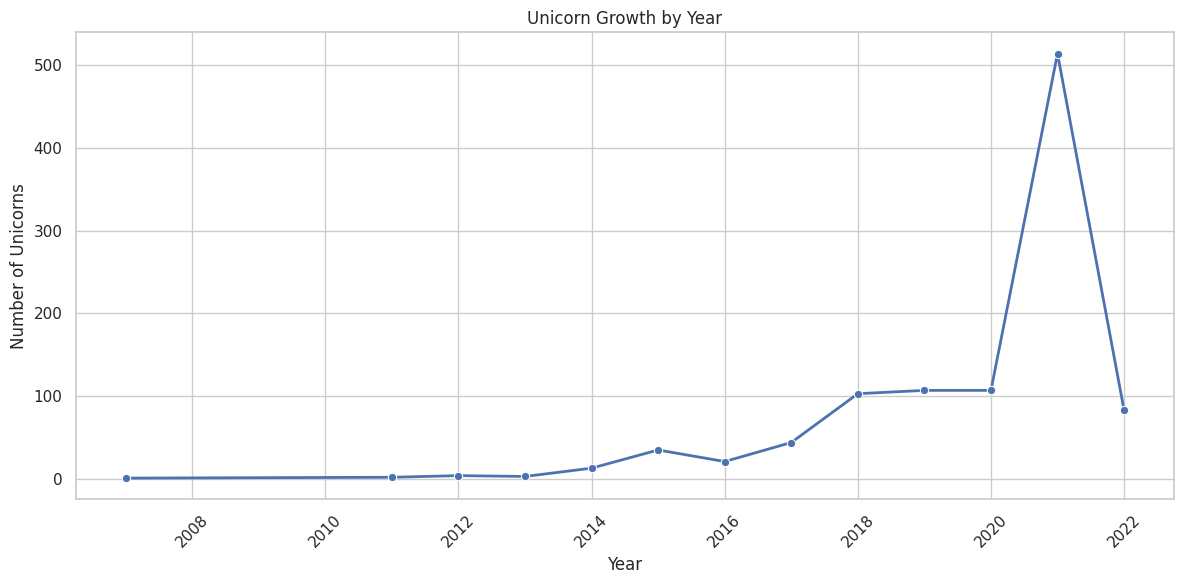

In [23]:
# Unicorns added each year
yearly_growth = df['Year Joined'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_growth.index, y=yearly_growth.values, marker="o", linewidth=2)
plt.title("Unicorn Growth by Year")
plt.xlabel("Year")
plt.ylabel("Number of Unicorns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Top 10 Industries by Unicorn Count**

/tmp/ipython-input-3190210147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette="coolwarm")


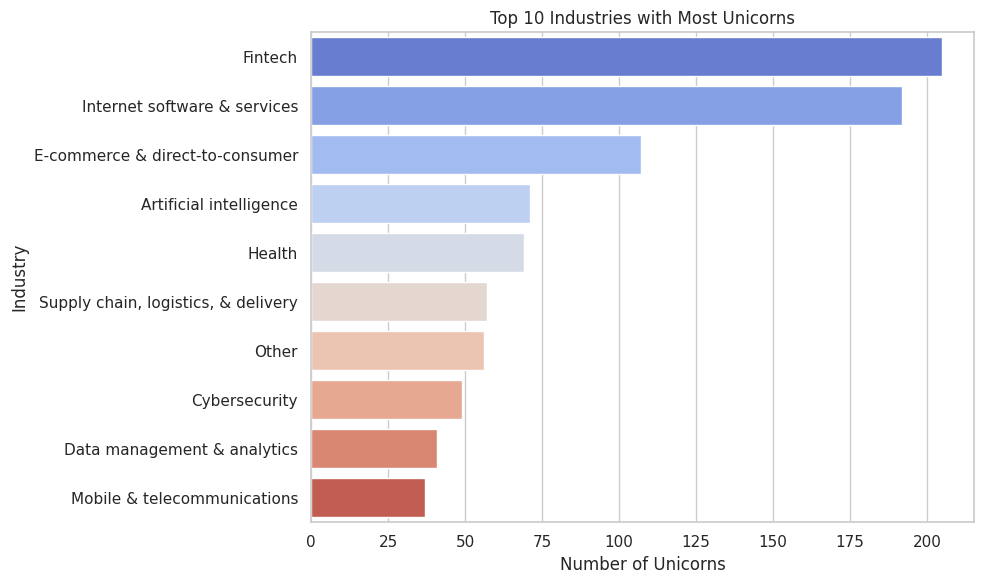

In [24]:
top_industries = df['Industry'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="coolwarm")
plt.title("Top 10 Industries with Most Unicorns")
plt.xlabel("Number of Unicorns")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

#### **Top 10 Most Valuable Unicorns**

/tmp/ipython-input-2755375873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_valued['Valuation ($B)'], y=top_valued['Company'], palette="magma")


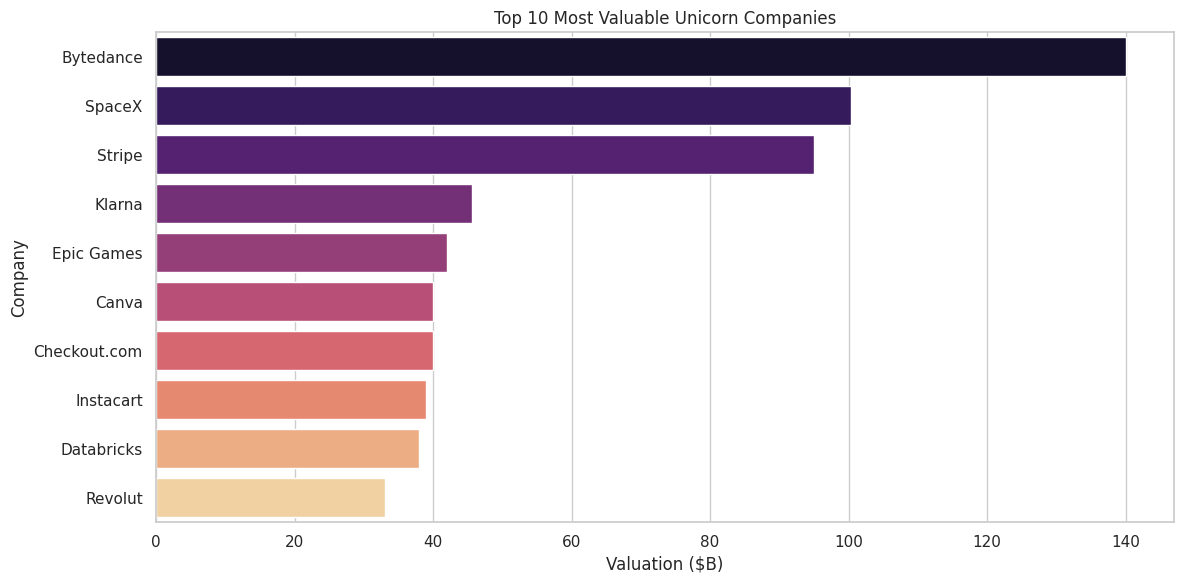

In [25]:
top_valued = df.sort_values(by='Valuation ($B)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_valued['Valuation ($B)'], y=top_valued['Company'], palette="magma")
plt.title("Top 10 Most Valuable Unicorn Companies")
plt.xlabel("Valuation ($B)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

#### **Average Valuation by Top 10 Industries**

/tmp/ipython-input-955282732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_valuation.values, y=avg_valuation.index, palette="cubehelix")


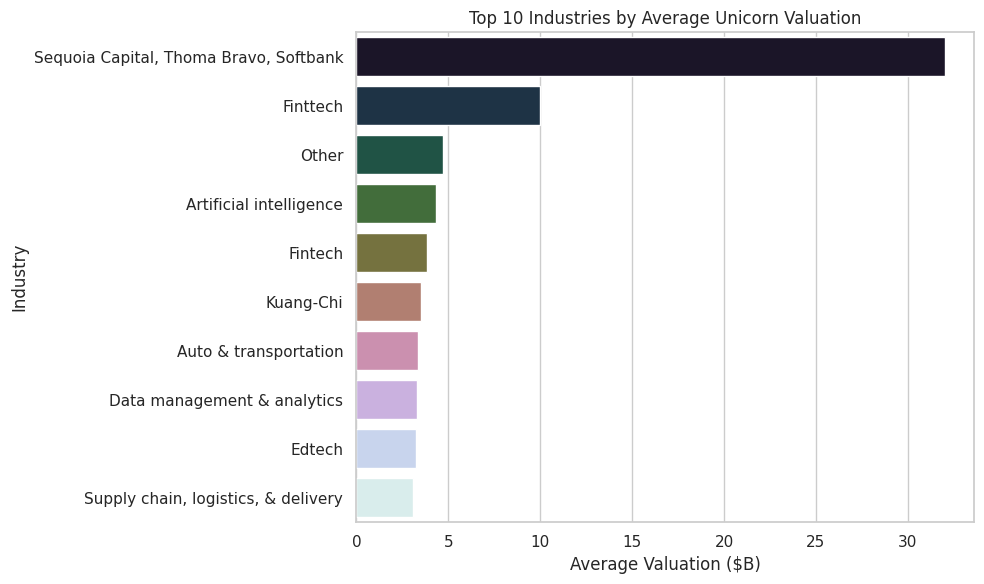

In [26]:
avg_valuation = df.groupby('Industry')['Valuation ($B)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_valuation.values, y=avg_valuation.index, palette="cubehelix")
plt.title("Top 10 Industries by Average Unicorn Valuation")
plt.xlabel("Average Valuation ($B)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

#### **Unicorn Distribution by Country and Industry**

In [27]:
import plotly.express as px

# group by Country and Industry for treemap
df_treemap = df.groupby(['Country', 'Industry'])['Company'].count().reset_index()
df_treemap.columns = ['Country', 'Industry', 'Count']

fig = px.treemap(df_treemap, path=['Country', 'Industry'], values='Count',
                 title='Unicorn Count by Country and Industry',
                 color='Count', color_continuous_scale='viridis')
fig.show()

#### **Unicorn Growth by Year**

In [28]:
# group by Year and Industry
df_animated = df.groupby(['Year Joined', 'Industry'])['Company'].count().reset_index()

fig = px.bar(df_animated, x='Industry', y='Company', color='Industry',
             animation_frame='Year Joined', range_y=[0, df_animated['Company'].max()+5],
             title="Unicorn Count by Industry Over the Years")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#### **Map of Unicorns by Country**

In [29]:
# country level unicorn count
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Unicorn Count']

fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                    color='Unicorn Count', hover_name='Country',
                    title='Global Distribution of Unicorn Companies',
                    color_continuous_scale='plasma')
fig.show()

#### **Correlation Heatmap**

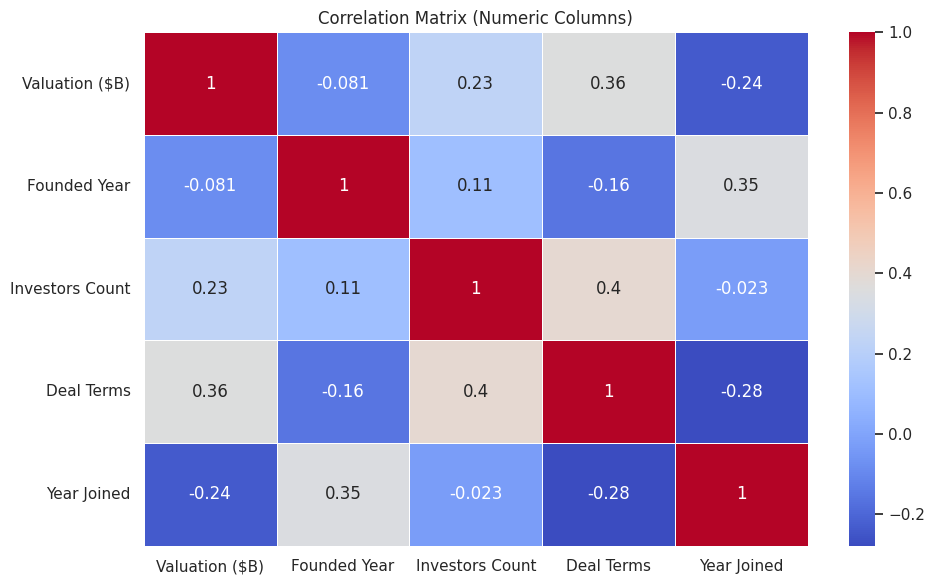

In [30]:
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Columns)")
plt.tight_layout()
plt.show()

#### **Word Cloud of Investors**

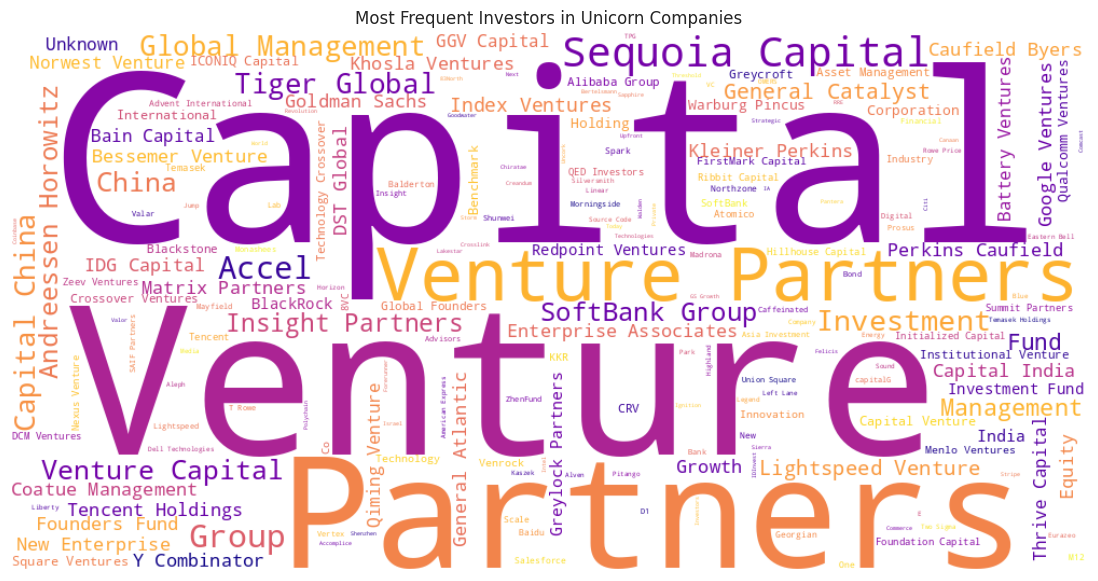

In [32]:
from wordcloud import WordCloud

investors_text = df['Select Inverstors'].dropna().str.cat(sep=', ')

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(investors_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Investors in Unicorn Companies")
plt.show()

## **Streamlit App**

In [33]:
! pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [41]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# PAGE SETUP
st.set_page_config(
    page_title="Unicorn Tracker",
    layout="wide",
    page_icon=":chart_with_upwards_trend:"
)

st.markdown("""
    <style>
    .main {
        background-color: #f8f9fa;
    }
    .stMetric {
        background-color: white;
        border-radius: 10px;
        padding: 15px;
        box-shadow: 0 4px 6px rgba(0,0,0,0.1);
    }
    .stPlotlyChart {
        border-radius: 10px;
        box-shadow: 0 4px 6px rgba(0,0,0,0.1);
    }
    .css-1v0mbdj {
        border-radius: 10px;
    }
    .sidebar .sidebar-content {
        background-color: #f8f9fa;
    }
    </style>
    """, unsafe_allow_html=True)

# DATA LOADING
@st.cache_data
def load_data():
    df = pd.read_csv("/content/Unicorn_Companies.csv")
    df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')
    df['Year Joined'] = df['Date Joined'].dt.year
    df['Valuation ($B)'] = df['Valuation ($B)'].replace('[\$,B]', '', regex=True).astype(float)
    return df

df = load_data()

# SIDEBAR FILTERS
st.sidebar.header("Filter Options")
years = st.sidebar.multiselect(
    "Select Year(s)",
    sorted(df['Year Joined'].dropna().unique()),
    default=sorted(df['Year Joined'].dropna().unique())
)
countries = st.sidebar.multiselect(
    "Select Country(s)",
    sorted(df['Country'].dropna().unique()),
    default=sorted(df['Country'].dropna().unique())
)
industries = st.sidebar.multiselect(
    "Select Industry(s)",
    sorted(df['Industry'].dropna().unique()),
    default=sorted(df['Industry'].dropna().unique())
)

# FILTERED DATA
filtered_df = df[df['Year Joined'].isin(years) & df['Country'].isin(countries) & df['Industry'].isin(industries)]

# HEADER
st.title("Unicorn Company Tracker")
st.markdown("Tracking the world's most valuable private companies")

# KPIs
col1, col2, col3 = st.columns(3)
col1.metric("Total Unicorns", f"{filtered_df.shape[0]:,}")
col2.metric("Average Valuation ($B)", f"{filtered_df['Valuation ($B)'].mean():.2f}")
col3.metric("Top Country", filtered_df['Country'].value_counts().idxmax())

# VISUALIZATIONS
st.header("Visual Insights")

# Bar Chart: Top Industries
top_industries = filtered_df['Industry'].value_counts().head(10)
fig_bar = px.bar(
    top_industries,
    x=top_industries.values,
    y=top_industries.index,
    orientation='h',
    title="<b>Top 10 Industries by Number of Unicorns</b>",
    labels={'x': 'Number of Unicorns', 'y': 'Industry'},
    color=top_industries.values,
    color_continuous_scale='Bluyl'
)
fig_bar.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)
st.plotly_chart(fig_bar, use_container_width=True)

# Line Chart: Yearly Unicorn Growth
yearly = filtered_df['Year Joined'].value_counts().sort_index()
fig_line = px.line(
    yearly,
    x=yearly.index,
    y=yearly.values,
    markers=True,
    title="<b>Unicorn Growth by Year</b>",
    labels={'x': 'Year', 'y': 'Number of Unicorns'},
    color_discrete_sequence=['#2E91E5']
)
fig_line.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)
st.plotly_chart(fig_line, use_container_width=True)

# Pie Chart: Unicorns by Country
top_countries = filtered_df['Country'].value_counts().head(10)
fig_pie = px.pie(
    top_countries,
    values=top_countries.values,
    names=top_countries.index,
    title='<b>Top 10 Countries by Unicorn Count</b>',
    hole=0.4,
    color_discrete_sequence=px.colors.sequential.Blues_r
)
st.plotly_chart(fig_pie, use_container_width=True)

# Treemap
tree_data = filtered_df.groupby(['Country', 'Industry'])['Company'].count().reset_index()
tree_data.columns = ['Country', 'Industry', 'Count']
fig_tree = px.treemap(
    tree_data,
    path=['Country', 'Industry'],
    values='Count',
    title="<b>Unicorns by Country & Industry</b>",
    color='Count',
    color_continuous_scale='Tealgrn'
)
st.plotly_chart(fig_tree, use_container_width=True)

# Data Table
st.header("Top 10 Most Valuable Unicorn Companies")
top_valued = filtered_df.sort_values(by='Valuation ($B)', ascending=False).head(10)
st.dataframe(
    top_valued[['Company', 'Valuation ($B)', 'Country', 'Industry']],
    column_config={
        "Valuation ($B)": st.column_config.NumberColumn(
            "Valuation ($B)",
            format="$%.2f"
        )
    }
)

# Footer
st.markdown("---")
st.caption("Data Source: Kaggle | Built using Python & Streamlit")

Overwriting app.py


In [36]:
from pyngrok import ngrok
import os

ngrok.set_auth_token("")

# Kill any previous tunnels
ngrok.kill()
os.system("streamlit run app.py &")

public_url = ngrok.connect(8501, "http")
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://e8a8c9596c98.ngrok-free.app" -> "http://localhost:8501"
